# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.2 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=ac05cd147fe4d148c9f64bb1926cde181218ad00d266c9e03cd859f9e88e286a
  Stored in directory: /root/.cache/pip/wheels/29/20/ab/f101da7b245b996aa097685ef742243725ea6150f5b3b6d9ed
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [5]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 121.6 MB/s eta 0:00:00


In [6]:
# 1. Install Lucent (The Interpretability Library)
# We use the standard pip package for ease of use.
# 1. Uninstall the incorrect package
!pip uninstall -y lucent

# 2. Install the correct package (The library is called 'torch-lucent' on pip)
!pip install torch-lucent
# 2. Imports
import torch
from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo import inceptionv1
import matplotlib.pyplot as plt

# 3. Load the Model
# We set the model to evaluation mode (standard practice for inference/vis)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = inceptionv1(pretrained=True)
model.to(device).eval()

print(f"Model loaded on {device}. Ready to dream.")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=679dde5304cb28a4ec35cb144b9d2e6cac83e21f626dbef729db5f6527507e59
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
Downloading: "https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth" to /root/.cache/torch/hub/checkpoints/inception5h.pth


100%|██████████| 27.0M/27.0M [00:00<00:00, 436MB/s]


Model loaded on cuda. Ready to dream.


# Segment 2: Activation Maximization

In Segment 1, we saw that layers act as "filters" for specific patterns. Now, we will invert the process. Instead of asking "What does the model see in this image?", we ask: **"What image would make this specific neuron fire as hard as possible?"**

This is called **Activation Maximization**. We start with random noise and use Gradient Ascent to tweak the pixels until the target neuron's activation is maximized.

### The Target: `mixed4a`
We will focus on layer `mixed4a`. Recall from our size analysis that this layer sits in the middle of the network (14x14 grid).
* **Too Early (mixed3a):** Just textures and simple lines.
* **Too Late (mixed5b):** Whole objects.
* **Just Right (mixed4a):** Complex, sophisticated patterns (curves, eyes, complex geometry) that act as the building blocks of vision.

In [9]:
# We want to visualize the first 10 neurons (channels 0 through 9) of mixed4a.
# We will store the results to display them in a neat grid.

layer = "mixed4a"
num_neurons = 10
images = []

print(f"Optimizing first {num_neurons} neurons in {layer}...")

for i in range(num_neurons):
    target = f"{layer}:{i}"

    # render_vis returns a list of results (usually just one unless batching)
    # show_inline=False keeps the notebook clean so we can plot them manually later
    vis_images = render.render_vis(model, target, show_inline=False)

    # The result is typically a list of (1, 128, 128, 3) arrays.
    # We grab the first one and the image data itself.
    images.append(vis_images[0])
    print(f"Finished Neuron {i}")

print("Optimization complete.")

Optimizing first 10 neurons in mixed4a...


100%|██████████| 512/512 [00:15<00:00, 33.70it/s]


Finished Neuron 0


100%|██████████| 512/512 [00:14<00:00, 35.14it/s]


Finished Neuron 1


100%|██████████| 512/512 [00:14<00:00, 35.16it/s]


Finished Neuron 2


100%|██████████| 512/512 [00:14<00:00, 34.16it/s]


Finished Neuron 3


100%|██████████| 512/512 [00:15<00:00, 32.60it/s]


Finished Neuron 4


100%|██████████| 512/512 [00:15<00:00, 33.53it/s]


Finished Neuron 5


100%|██████████| 512/512 [00:15<00:00, 34.06it/s]


Finished Neuron 6


100%|██████████| 512/512 [00:15<00:00, 33.38it/s]


Finished Neuron 7


100%|██████████| 512/512 [00:15<00:00, 32.94it/s]


Finished Neuron 8


100%|██████████| 512/512 [00:15<00:00, 33.52it/s]

Finished Neuron 9
Optimization complete.


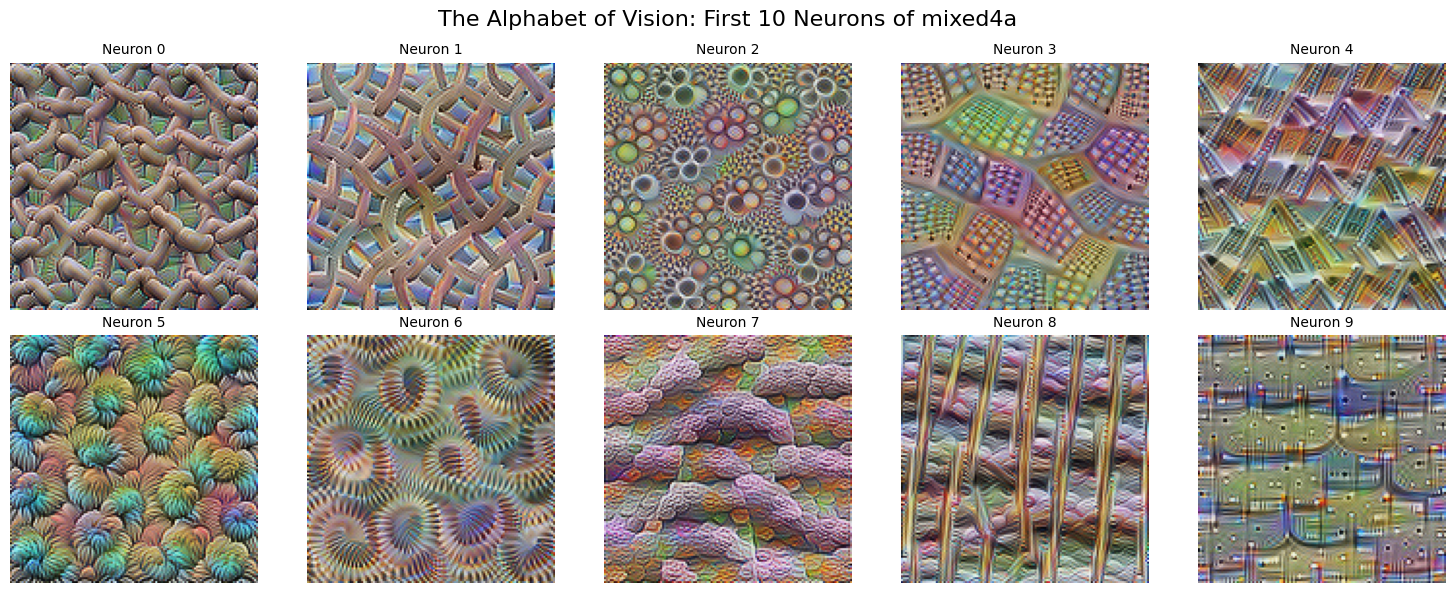

In [12]:
import numpy as np

# Create the figure
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = images[i]

    # HOTFIX: Check if the image has that extra batch dimension (1, 128, 128, 3)
    # If it does, we just grab the first item [0] to make it (128, 128, 3)
    if len(img.shape) == 4:
        img = img[0]

    ax.imshow(img)
    ax.set_title(f"Neuron {i}", fontsize=10)
    ax.axis("off")

plt.suptitle(f"The Alphabet of Vision: First 10 Neurons of {layer}", fontsize=16)
plt.tight_layout()
plt.show()